In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# For Predictive analysis and Machine Learning Tasks

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# For Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC       # SVC - Support Vector Machines - set of supervised learning methods used for classification,regression, and outliners detection.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

import pickle  # For serializing and de-serializing Python objects.

# To ignore deprecation warnings

import warnings
warnings.filterwarnings('ignore')

# For styling

plt.style.use('seaborn-whitegrid')

# Loading the datasets

data = pd.read_csv('C:/Users/vaibh/Downloads/archive/data-ori.csv')
data.head(5)


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [17]:
# Splitting the dataset into Train and Test sets

# Train Dataset - Used to fit the machine learning model.
# Test Dataset - Used to evaluate the fit machine learning model.

# Common Split percentages include :

# Train - 80% , Test - 20% 
# Train - 67% , Test - 33% (*)
# Train - 50% , Test - 50%

# In this analysis - Train - 67% , Test - 33% is used

# Label encoding
# 1 for in-care patient, 0 for out-care patient

data['SOURCE'] = data.SOURCE.replace({'in':1, 'out': 0})

# Get all the features 

features = [feat for feat in data.columns if feat !='SOURCE']

X = data[features] # feature set
Y = data['SOURCE'] # target set

# Spliting the data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1, stratify = Y)

# Train and Test datasets dimensions

X_train.shape, X_test.shape

((2956, 10), (1456, 10))

In [19]:
# Exploratory Data Analysis


# Datasets Overview

print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

num_features = [feat for feat in features if data[feat].dtype != object]
cat_features = [feat for feat in features if data[feat].dtype == object]

print(f"Total number of features : {len(features)}")
print(f"Number of numerical features : {len(num_features)}")
print(f"Number of categorical features : {len(cat_features)}\n")




The dataset contains 4412 rows and 11 columns
Total number of features : 10
Number of numerical features : 9
Number of categorical features : 1



In [20]:
# Identifying and handling the missing values

data.isna().mean().to_frame(name='Missing%')

,Missing%
HAEMATOCRIT,0.0
HAEMOGLOBINS,0.0
ERYTHROCYTE,0.0
LEUCOCYTE,0.0
THROMBOCYTE,0.0
MCH,0.0
MCHC,0.0
MCV,0.0
AGE,0.0
SEX,0.0


In [21]:
# Identifying the Uniue Values

# To count the number of unique values in each feature

data.nunique().to_frame(name = '# of unique values')

,# of unique values
HAEMATOCRIT,326
HAEMOGLOBINS,128
ERYTHROCYTE,433
LEUCOCYTE,276
THROMBOCYTE,554
MCH,189
MCHC,105
MCV,406
AGE,95
SEX,2


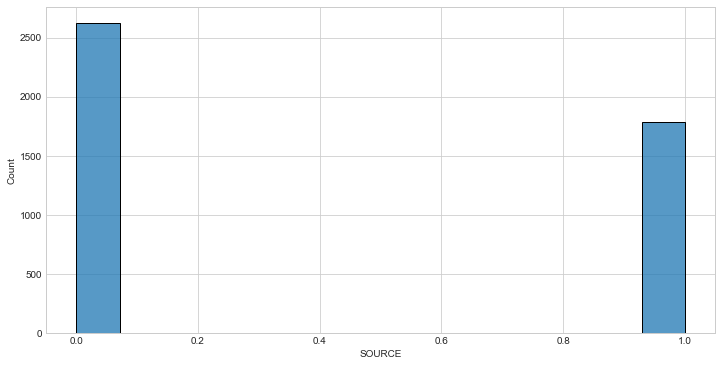

In [86]:
# Univariate analysis

# Target distribution

plt.figure(figsize=(12,6))
fig = sns.histplot(x='SOURCE', data=data)

In [27]:
# Count the categorical data

data.SOURCE.value_counts().to_frame(name='COUNT')

,COUNT
0,2628
1,1784


In [28]:
# Describe Statistics for each numerical features - (short summary) 

data[num_features].describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


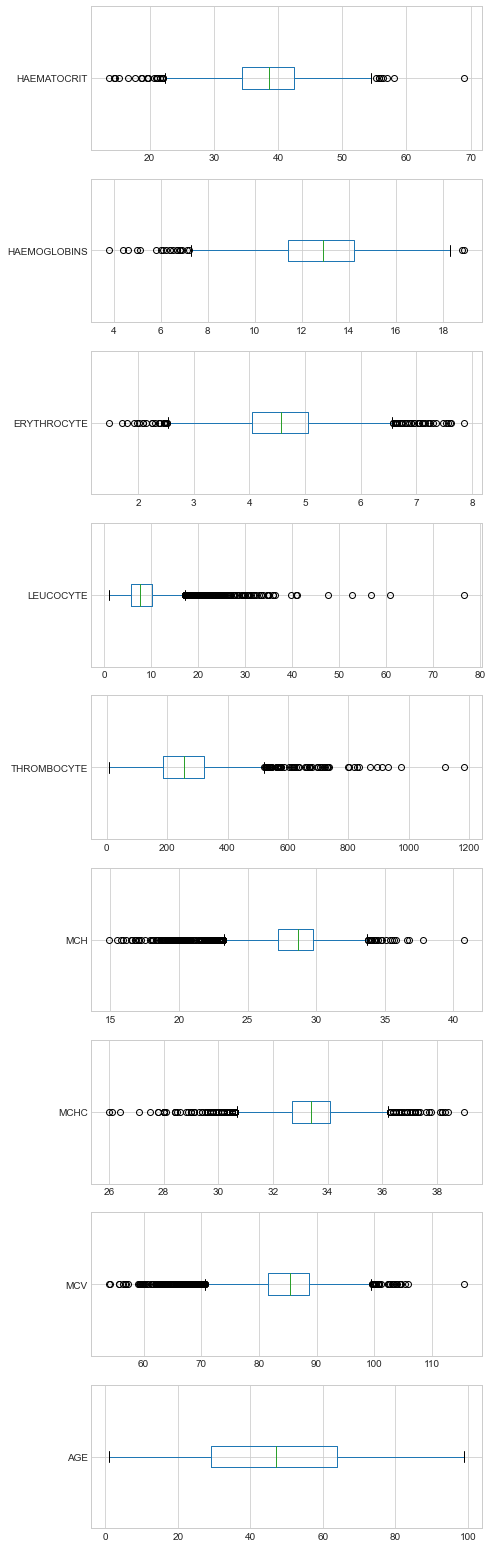

In [31]:
# Box Plot

fig, axes = plt.subplots(9, 1, figsize = (7,28))
for i, c in enumerate(num_features):
    f = data[[c]].boxplot(ax = axes[i], vert = False)

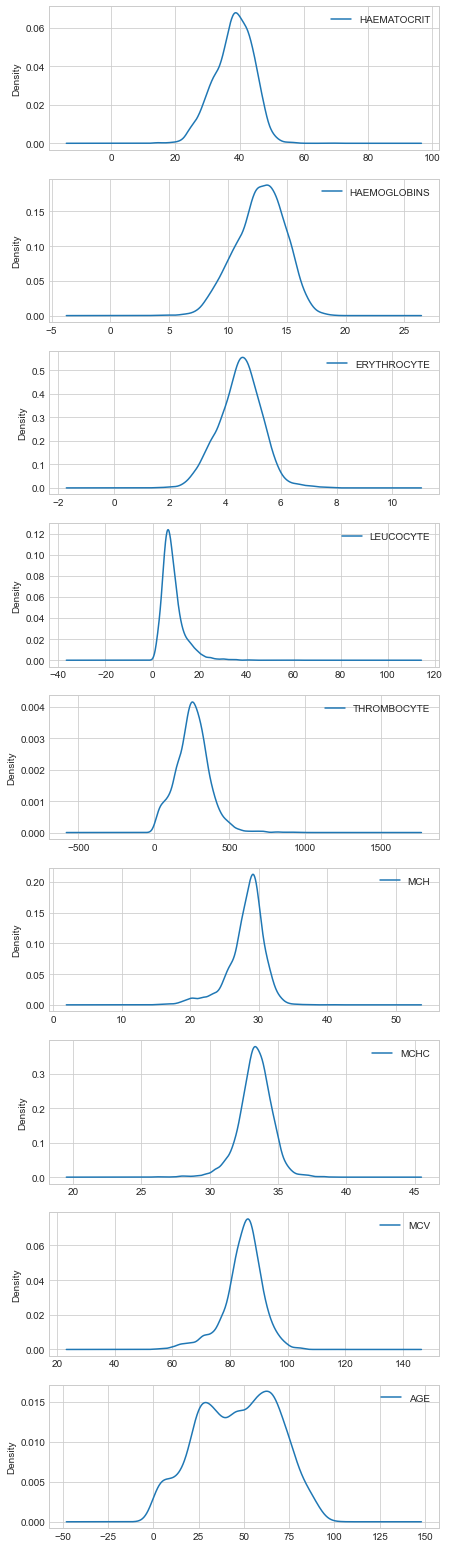

In [32]:
# Kernel Density Estimation Plot for each numerical features

fig, axes = plt.subplots(9, 1, figsize = (7, 28))
for i, c in enumerate(num_features):
    f = data[[c]].plot(kind ='kde', ax = axes[i])

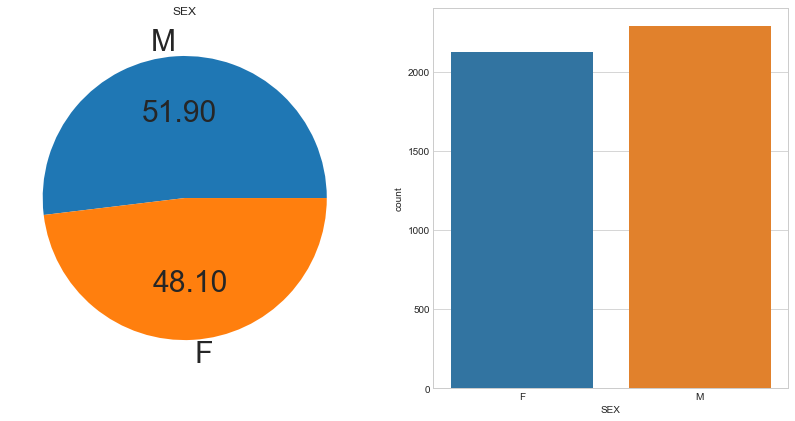

In [38]:
# Categorical Features (name : sex, labels : F, M)

# Bar graph for categorical features

fig, axes = plt.subplots(1,2, figsize = (14, 7))
df = data['SEX'].value_counts()
barplot = df.plot(kind = 'pie', ax = axes[0], title = 'SEX', autopct = '%.2F', 
                  fontsize = 30, ylabel = '')
countplot = sns.countplot(x= 'SEX', data = data, ax = axes[1])



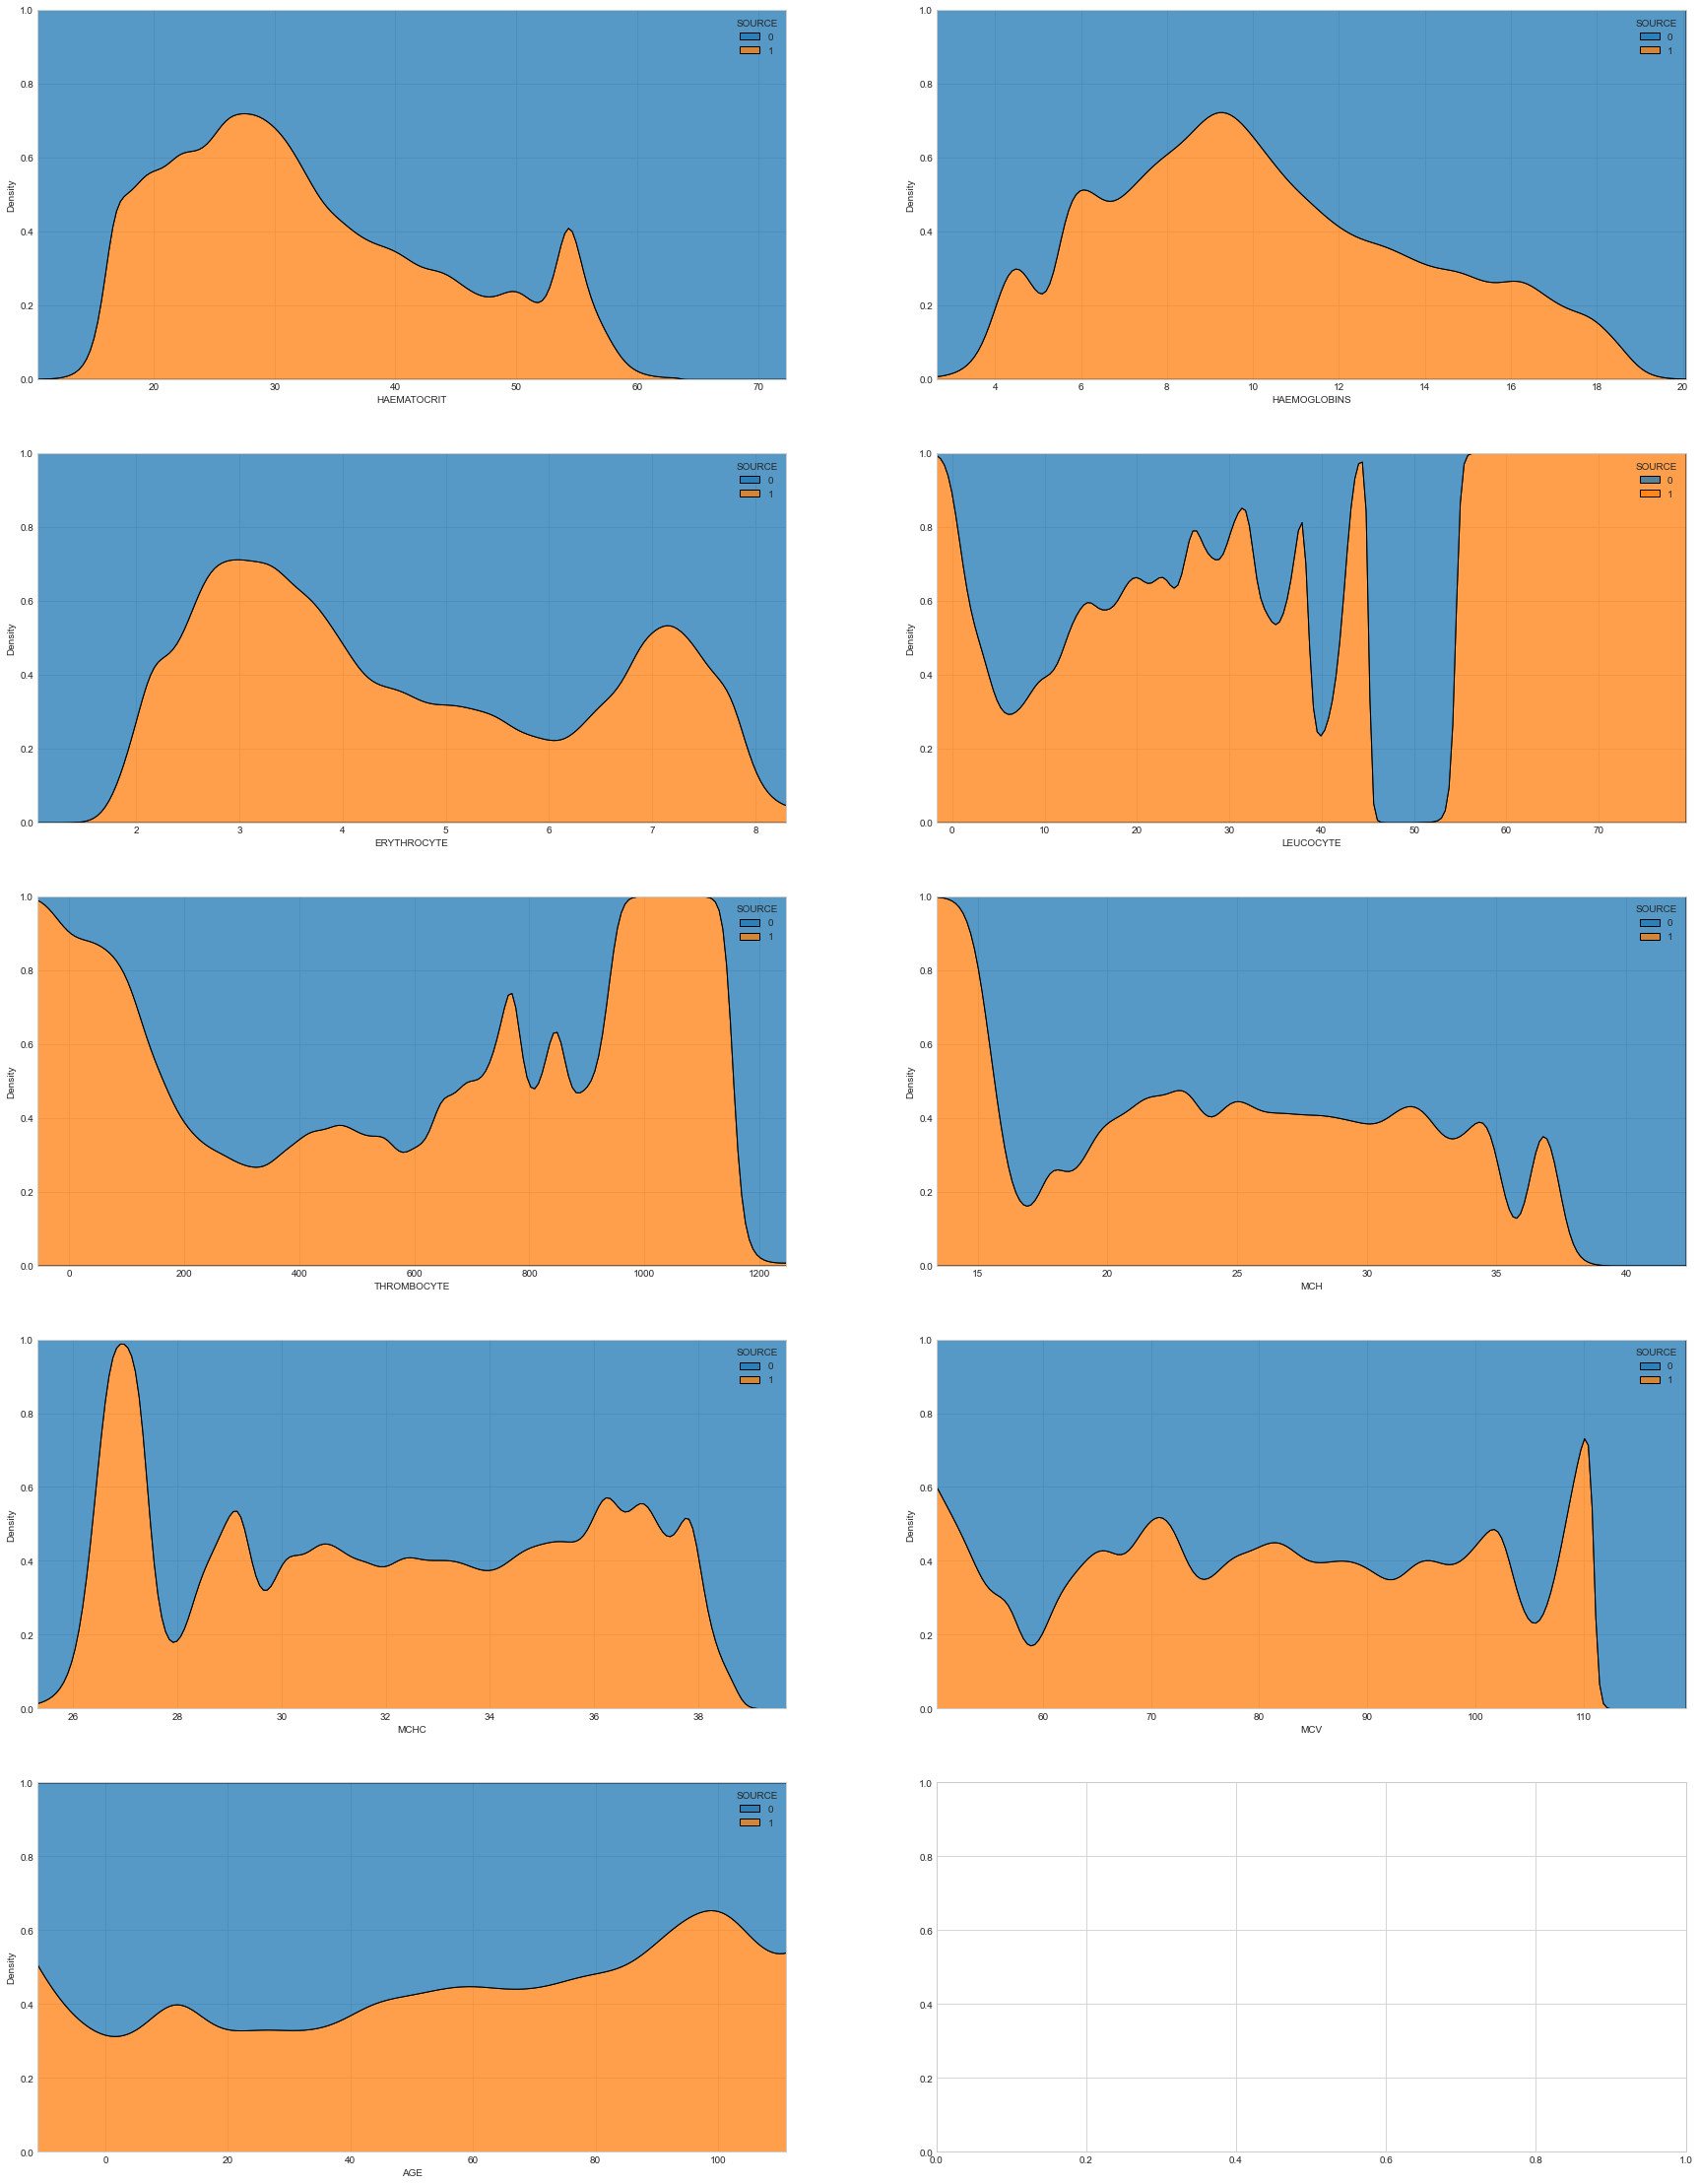

In [47]:
# Bivariate Analysis

# 1. Numerical Features

# KDE Plot

fig, axes = plt.subplots(5,2, figsize = (30, 40))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[num_features]):
    plot = sns.kdeplot(data = data, x = c, hue = 'SOURCE', 
                   multiple = 'fill', ax = axes[i])

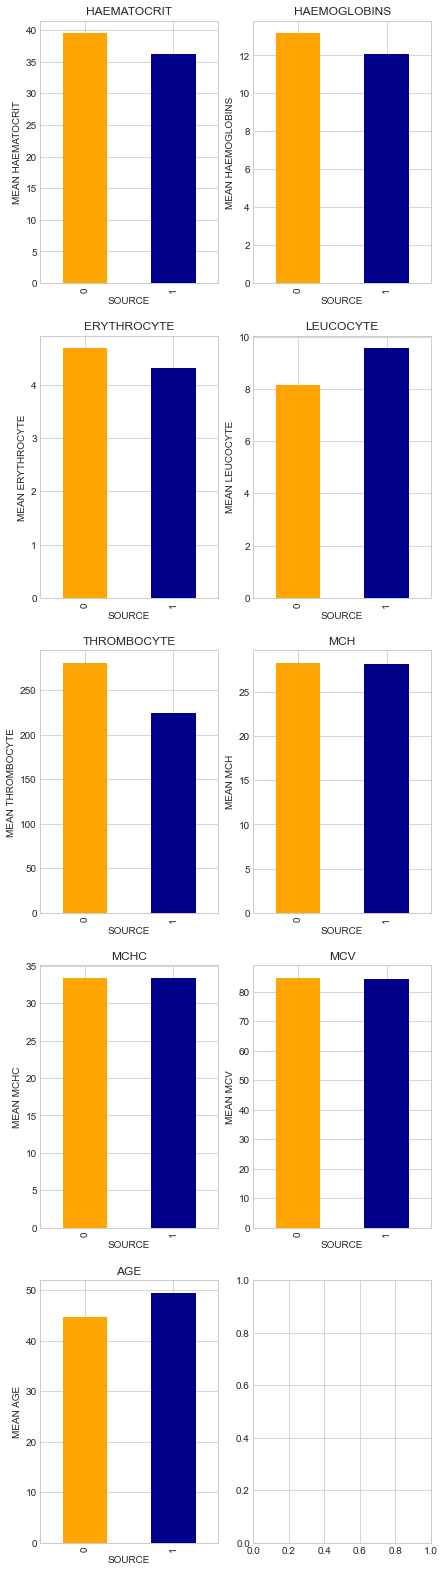

In [48]:
# Relationship between target and mean of each numerical features

fig, axes = plt.subplots(5,2, figsize = (7,28))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[num_features]):
    df=data.groupby('SOURCE')[c].mean()
    plot = df.plot(kind = 'bar', title = c, ax = axes[i], ylabel = f'MEAN {c}',
                  color = ('orange', 'darkblue'))

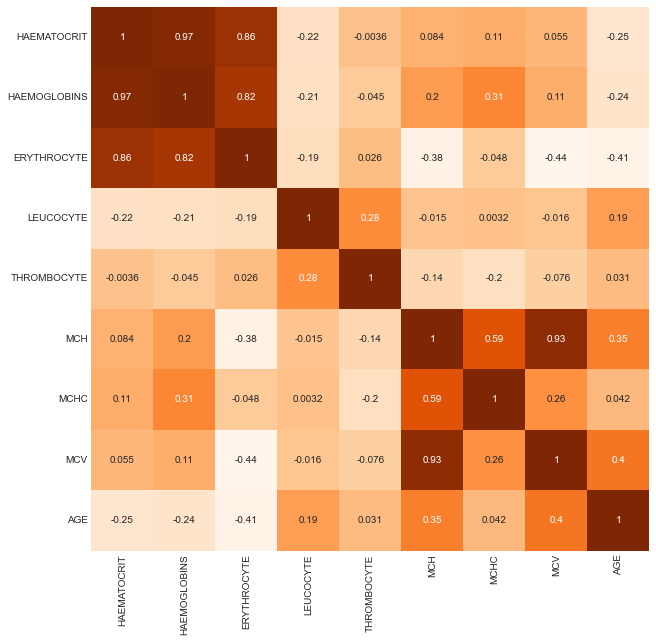

In [55]:
# Correlation

corr_matt = data[num_features].corr(method = 'pearson')
plt.figure(figsize=(10,10))
corr = sns.heatmap(corr_matt, annot = True, cmap = 'Oranges', cbar=False)

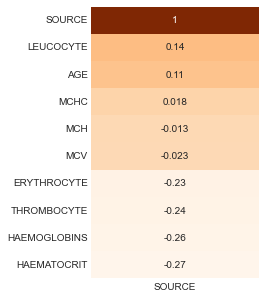

In [69]:
# Pearson's Correlation of features with respect to target

corr_matt = data.corr(method = 'pearson')[['SOURCE']].sort_values (by ='SOURCE', ascending = False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot = True, cmap = 'Oranges', cbar = False)

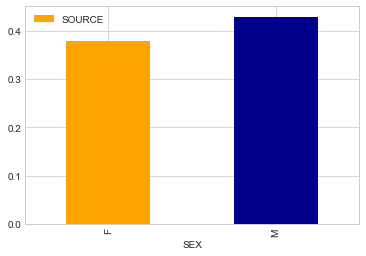

In [70]:
# Categorical features

df = data.groupby('SEX')['SOURCE'].mean().to_frame().reset_index()
plot = df.plot(kind = 'bar', x ='SEX', y= 'SOURCE', 
               color = ('Orange', 'darkblue'))

In [73]:
# Feature Scaling

# Transform all the numerical features into range [0,1]

X_train.SEX.replace({'F':0, 'M':1}, inplace = True)
X_test.SEX.replace({'F':0, 'M':1}, inplace=True)

# Feature Scaling

# MinMaxScaler is used to scale the features to range of [0,1]

scaler = MinMaxScaler(feature_range=(0,1))

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

X_train.head(5)


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
2094,0.508235,0.593333,0.407166,0.142379,0.256170,0.586873,0.707692,0.511364,0.459184,1
2234,0.658824,0.706667,0.570033,0.067002,0.267234,0.490347,0.607692,0.444805,0.479592,1
811,0.807059,0.846667,0.638436,0.023451,0.077447,0.555985,0.600000,0.527597,0.244898,1
2947,0.360000,0.446667,0.301303,0.484087,0.222979,0.559846,0.707692,0.478896,0.591837,0
4213,0.411765,0.460000,0.304560,0.155779,0.239149,0.575290,0.569231,0.569805,0.816327,1


In [74]:
# Feature Selection

# In exploratory data analysis, MCH,MCHC, and MCV are not very useful in predicting the targets.

# Removing least correlated features - MCH, MCHC, MCV

X_train.drop(['MCH', 'MCHC', 'MCV'], axis = 1, inplace=True)
X_test.drop(['MCH', 'MCHC', 'MCV'], axis = 1, inplace=True)

X_train.head(5)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,AGE,SEX
2094,0.508235,0.593333,0.407166,0.142379,0.256170,0.459184,1
2234,0.658824,0.706667,0.570033,0.067002,0.267234,0.479592,1
811,0.807059,0.846667,0.638436,0.023451,0.077447,0.244898,1
2947,0.360000,0.446667,0.301303,0.484087,0.222979,0.591837,0
4213,0.411765,0.460000,0.304560,0.155779,0.239149,0.816327,1


In [75]:
# MACHINE LEARNING


# Decision Tree Classifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, Y_train)

print("Train accuracy:", accuracy_score(Y_train, tree.predict(X_train)))
print("Test accuracy:", accuracy_score(Y_test, tree.predict(X_test)))


Train accuracy: 1.0
Test accuracy: 0.6483516483516484


In [78]:
# Hyperparameters 

distribution = {'max_depth':[4,6,8,10,12,16],
               'criterion': ['gini', 'entropy'],
               'min_samples_split': [2,10,20,30,40],
               'max_features': [0.2,0.4,0.6,0.8,1],
               'max_leaf_nodes': [8,16,32,64,128,256],
               'class_weight': [{0:1,1:2},{0:1,1:3},{0:1,1:4},{0:1,1:5}]
               }


# Random search for best hyperparameters

search = RandomizedSearchCV(DecisionTreeClassifier(random_state=1),
                           distribution, scoring='accuracy',
                           cv=3,verbose=1,random_state=1, n_iter=30)

search.fit(X_train, Y_train)

# Best Parameters for DT Classifier

search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'min_samples_split': 20,
 'max_leaf_nodes': 8,
 'max_features': 0.2,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 2}}

In [79]:
# Retrain with best model

best_tree = search.best_estimator_

best_tree.fit(X_train, Y_train)

print("Best train accuracy :", accuracy_score(Y_train, 
                                              best_tree.predict(X_train)))
print("Best test accuracy :", accuracy_score(Y_test, 
                                              best_tree.predict(X_test)))

Best train accuracy : 0.6935047361299053
Best test accuracy : 0.6730769230769231


In [80]:
print(classification_report(Y_test, best_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       867
           1       0.57      0.75      0.65       589

    accuracy                           0.67      1456
   macro avg       0.68      0.68      0.67      1456
weighted avg       0.70      0.67      0.68      1456



In [81]:
# Logistic regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

print("Train accuracy :", accuracy_score(Y_train, 
                                              logreg.predict(X_train)))
print("Test accuracy :", accuracy_score(Y_test, 
                                              logreg.predict(X_test)))



Train accuracy : 0.7090663058186739
Test accuracy : 0.7142857142857143


In [83]:
# Hyperparameter tuning - Support vector classifier

param_grid={'C': [0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['liner','rbf','poly'],
           'degree':[0,1,2,3,4,5,6]
           }

# Random search for best hyperparameters

search = RandomizedSearchCV(SVC(random_state=1), param_grid,
                           scoring='accuracy', cv=3,
                           verbose=1,
                           random_state=1,
                           n_iter=30)

search.fit(X_train,Y_train)

# Best parameters for support vector classifier

search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'kernel': 'rbf', 'gamma': 0.1, 'degree': 4, 'C': 100}